In [1]:
import pickle
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import nibabel as nib
import ants
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation
import cv2
import bigbadbrain as bbb
import scipy
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
import matplotlib
import tqdm
import brainsss

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [2]:
cluster_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20221109_cluster_pca/"

In [3]:
file = os.path.join(cluster_dir, 'superclusters_more.npy')
superclusters = np.load(file)
#with 249 there will be clusters 1-250 inclusive (len=250). cluster 140 is background
superclusters_250 = superclusters[:,:,:,249]
# right brain gets +250 to cluster ID so now 500 clusters
superclusters_250[157:,:,:] += 250

In [4]:
### load already created
hist_3d = np.load(os.path.join(cluster_dir, '20221210_3d_hists.npy'))
hist_3d.shape

(251, 2, 400, 25, 25)

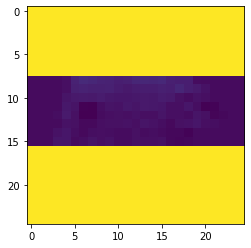

In [23]:
plt.imshow(hist_3d[77,0,200,:,:])
test=hist_3d[77,0,200,:,:].copy()
test[:8,:]=1
test[16:,:]=1
plt.imshow(test)


In [ ]:
### define boxes

# slow walk
[11:13,9:13]

#left turn
[:8,:]

#right turn
[16:,:]

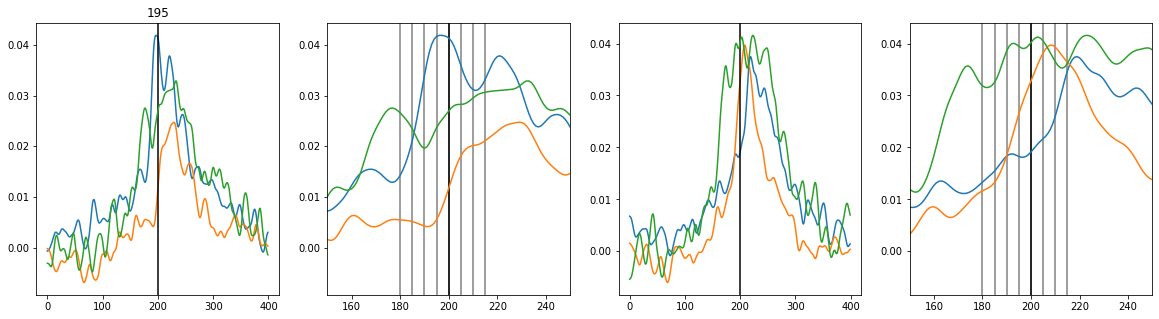

In [25]:
cluster = 195

thishist = hist_3d[cluster,0,:,:,:]
wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]

plt.figure(figsize=(20,5))

plt.subplot(141)
mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))
mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))
plt.axvline(200,color='k')
plt.plot(np.mean(wlk,axis=(1,2)))
plt.title(cluster)


plt.subplot(142)
for i in np.arange(180,220,5):
    plt.axvline(i,color='grey')
plt.axvline(200,color='k')
mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))
mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))
plt.plot(np.mean(wlk,axis=(1,2)))
plt.xlim(150,250)

thishist = hist_3d[cluster,1,:,:,:]
wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]



plt.subplot(143)
mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))
mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))
plt.axvline(200,color='k')
plt.plot(np.mean(wlk,axis=(1,2)))

plt.subplot(144)
for i in np.arange(180,220,5):
    plt.axvline(i,color='grey')
plt.axvline(200,color='k')
mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))
mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))
plt.plot(np.mean(wlk,axis=(1,2)))
plt.xlim(150,250)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

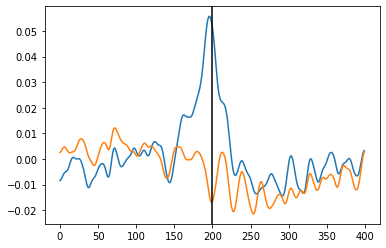

In [63]:
thishist = hist_3d[77,0,:,:,:]

wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]

mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1)-np.mean(wlk,axis=(1,2)))

mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1)-np.mean(wlk,axis=(1,2)))

plt.axvline(200,color='k')
# plt.plot(np.mean(wlk,axis=(1,2)))

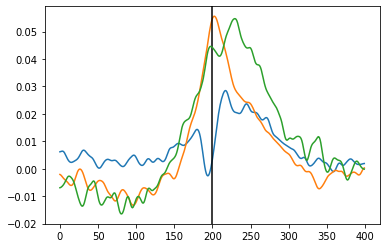

In [58]:
thishist = hist_3d[77,1,:,:,:]

wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]

mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))

mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))

plt.axvline(200,color='k')
plt.plot(np.mean(wlk,axis=(1,2)))

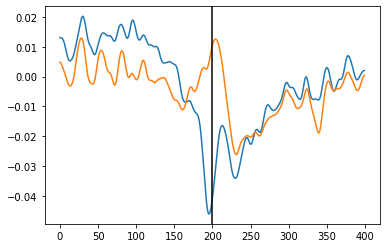

In [64]:
thishist = hist_3d[77,1,:,:,:]

wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]

mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1)-np.mean(wlk,axis=(1,2)))

mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1)-np.mean(wlk,axis=(1,2)))

plt.axvline(200,color='k')
#plt.plot(np.mean(wlk,axis=(1,2)))

# .

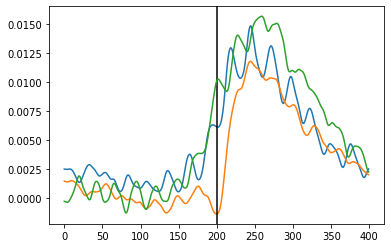

In [83]:
thishist = hist_3d[173,0,:,:,:]

wlk = thishist[:,11:13,9:13]
left = thishist[:,:8,:]
right = thishist[:,16:,:]

mask = np.where(left[200,:,:]!=0)
plt.plot(np.mean(left[:,mask[0],mask[1]],axis=1))

mask = np.where(right[200,:,:]!=0)
plt.plot(np.mean(right[:,mask[0],mask[1]],axis=1))

plt.axvline(200,color='k')
plt.plot(np.mean(wlk,axis=(1,2)))

# whaat about cross corr of opposite regions?

In [63]:
### Load Supercluster Signals ###
file = os.path.join(cluster_dir, "20221202_SC_signals.npy")
supercluster_signals = np.load(file)
supercluster_signals.shape

(501, 30456)

In [64]:
file = os.path.join(cluster_dir,"20221122_behavior_fwd.npy")
beh_fwd = np.load(file)
print(beh_fwd.shape)

file = os.path.join(cluster_dir,"20221122_behavior_turn.npy")
beh_turn = np.load(file)
print(beh_turn.shape)

(30456,)
(30456,)


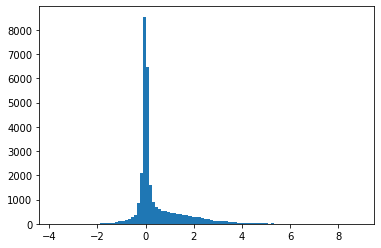

In [97]:
plt.hist(beh_fwd,bins=100);

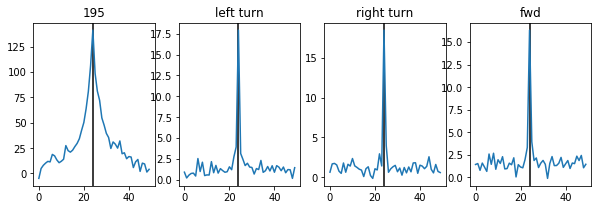

In [111]:
plt.figure(figsize=(10,3))

cluster = 195

plt.subplot(141)
a = supercluster_signals[cluster,:].copy()
b = supercluster_signals[cluster+250,:].copy()
out = scipy.signal.correlate(a, b)
window = 25
plt.axvline(window-1,color='k')
plt.plot(out[30456-window:30456+window])
plt.title(cluster)

plt.subplot(142)
plt.title("left turn")
a = supercluster_signals[cluster,:].copy()
b = supercluster_signals[cluster+250,:].copy()
a[np.where(beh_turn<0.75)[0]] = 0
b[np.where(beh_turn<0.75)[0]] = 0
out = scipy.signal.correlate(a, b)
window = 25
plt.axvline(window-1,color='k')
plt.plot(out[30456-window:30456+window])

plt.subplot(143)
plt.title("right turn")
a = supercluster_signals[cluster,:].copy()
b = supercluster_signals[cluster+250,:].copy()
a[np.where(beh_turn>-0.75)[0]] = 0
b[np.where(beh_turn>-0.75)[0]] = 0
out = scipy.signal.correlate(a, b)
window = 25
plt.axvline(window-1,color='k')
plt.plot(out[30456-window:30456+window])

plt.subplot(144)
plt.title("fwd")
a = supercluster_signals[cluster,:].copy()
b = supercluster_signals[cluster+250,:].copy()

a[np.where(beh_fwd<0.75)[0]] = 0
b[np.where(beh_fwd<0.75)[0]] = 0

a[np.where(np.logical_and(beh_turn<0.75,beh_turn>-0.75))[0]] = 0
b[np.where(np.logical_and(beh_turn<0.75,beh_turn>-0.75))[0]] = 0

out = scipy.signal.correlate(a, b)
window = 25
plt.axvline(window-1,color='k')
plt.plot(out[30456-window:30456+window])

### peaks to left mean a happens first (ie, left hemi)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

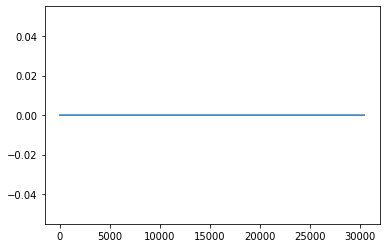

In [101]:
plt.plot(b)

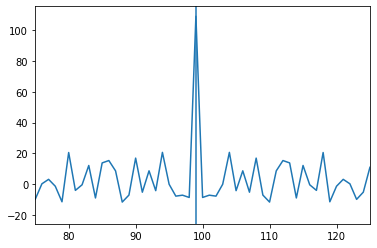

In [94]:
noise = np.random.normal(0,1,100)
out = scipy.signal.correlate(noise, noise)
plt.plot(out)
plt.xlim(75,125)
plt.axvline(100-1)

In [89]:
len(out)/2

30455.5

In [ ]:
np

In [30]:
30456*2

60912